In [80]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from math import sin
from math import pi

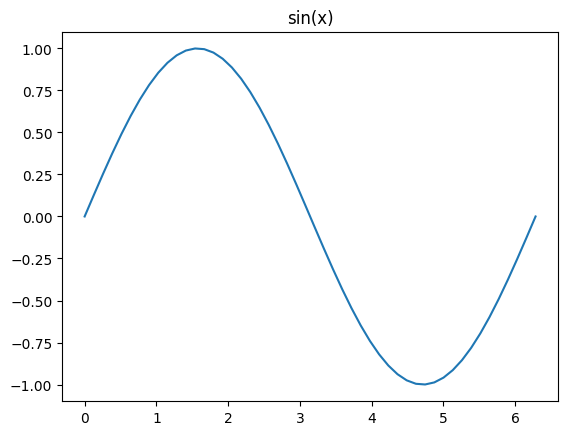

In [81]:
t = np.linspace(0,2*pi)
y = [sin(x) for x in t]

plt.plot(t,y)
plt.title("sin(x)")
plt.show()

In [82]:
poly = PolynomialFeatures(10)

poly_features = poly.fit_transform(t.reshape(-1,1))

     Coeficients
0   0.000000e+00
1   9.997449e-01
2   1.553893e-03
3  -1.703430e-01
4   4.474617e-03
5   5.163728e-03
6   1.382940e-03
7  -5.744808e-04
8   6.106715e-05
9  -2.159814e-06
10  3.472778e-13


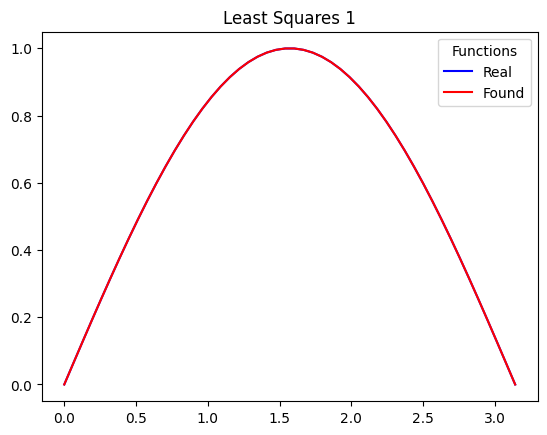

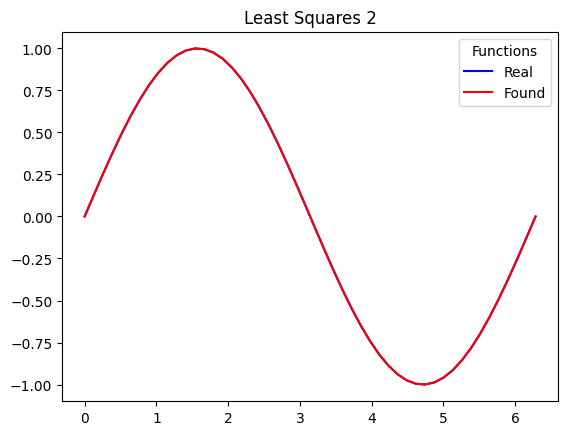

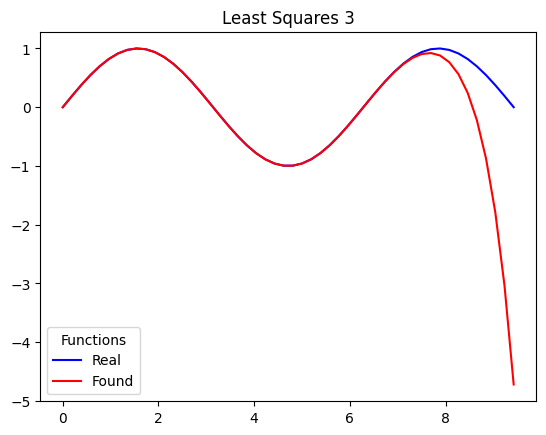

     Coeficients
0   1.601659e+10
1   3.768241e+11
2   2.013450e+12
3   9.784914e+12
4   4.619254e+13
5   2.133317e+14
6   9.555252e+14
7   4.058382e+15
8   1.552601e+16
9   4.567162e+16
10  1.345699e+16


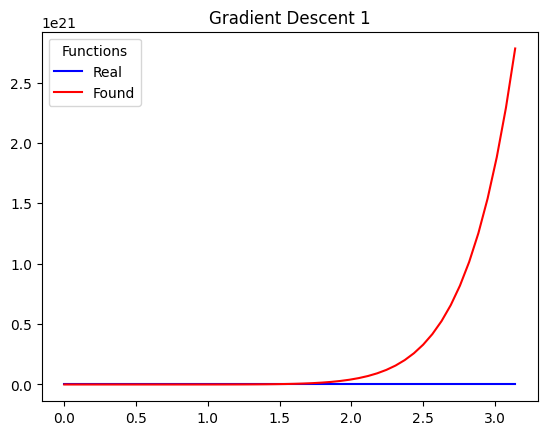

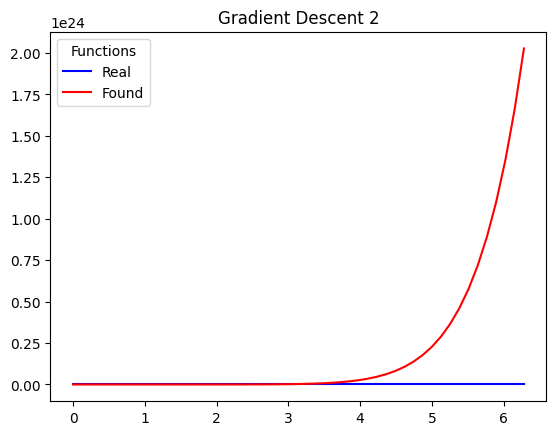

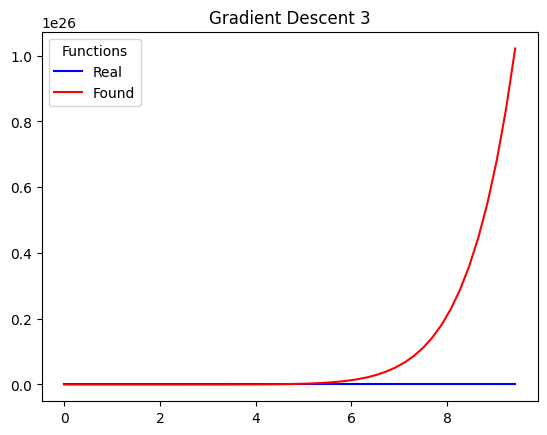

    Coeficients
0      0.000000
1      0.326066
2      0.230447
3      0.071330
4     -0.075065
5     -0.082026
6      0.064382
7     -0.017809
8      0.002420
9     -0.000161
10     0.000004


/home/luis/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.83152e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


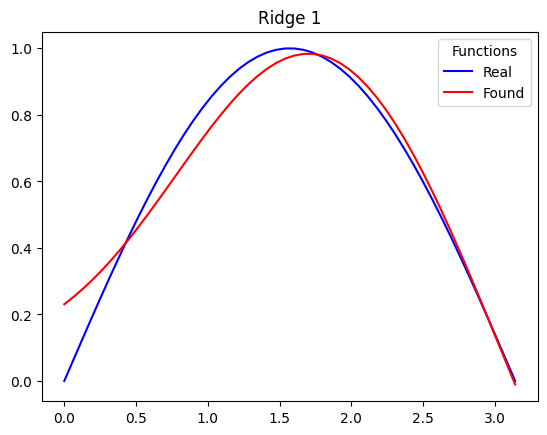

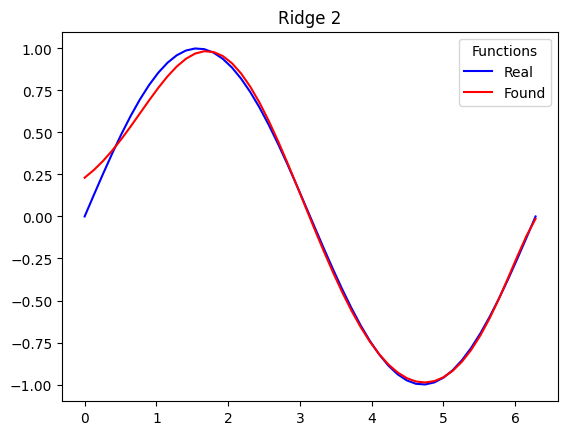

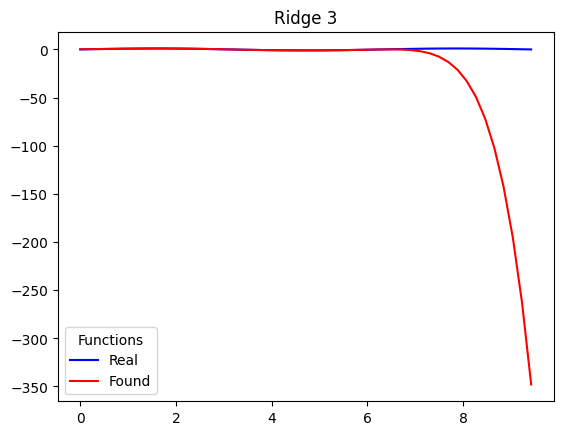

In [83]:
names = ( "Least Squares" , "Gradient Descent" , "Ridge" )
objs  = ( linear_model.LinearRegression() , linear_model.SGDRegressor() , linear_model.Ridge()  )

for i in range(len(objs)):
    
    objs[i].fit(poly_features,y)

    valores = objs[i].coef_
    data = {"Coeficients" : valores}
    df = pd.DataFrame(data)
    print(df)

    for j in range(1,4):

        t_ = np.linspace(0,j*pi)
        poly_features_ = poly.fit_transform(t_.reshape(-1,1))

        y_ = [sin(x) for x in t_]
        y_found = objs[i].predict(poly_features_)

        plt.plot(t_,y_,color="blue",label="Real")
        plt.plot(t_,y_found,color="red",label="Found")
        plt.legend(title='Functions')

        plt.title(f'{names[i]} {j}')
        plt.show()
